# Язык программирования Python

## Домашнее задание | СКБ

### Модуль 2

## Numpy [12/100]

При решении задач этого раздела подразумевается максимальное использование возможностей `Numpy`.

За использование любых сторонних циклов и их заменителей (итераторов, генераторов и др.) выставляется штраф.

### Numpy [A]

В файле `elements.npz` расположены два массива:
- `nodes` - массив (N, 2), содержащий координаты точек (float)
- `tris` - массив (M, 3), содержащий тройки индексов (i, j, k) такие, что точки с индексами i, j, k из массива `nodes` образуют треугольник

Требуется для всех треугольников:
- вычислить:
    - координаты геометрических центров
    - площади
    - величины минимальных углов
- проверить утверждение:
    - во всех треугольниках вершины расположены по/против часовой стрелки

In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from numpy import load

data = load('elements.npz')
lst = data.files
arr_nodes = data["nodes"]
arr_tris = data["tris"].astype("int")
arr = arr_nodes[arr_tris]


- координаты геометрических центров

In [3]:
def calculate_coordinates(s):
    return [(s[0][0] + s[1][0] + s[2][0])/3, (s[0][1] + s[1][1] + s[2][1])/3]
coor = list(map(calculate_coordinates, arr))
coor

[[0.06666666666666667, 8.428070175438597],
 [1.5719298245614037, 9.933333333333335],
 [0.568421052631579, 9.933333333333335],
 [2.5754385964912285, 9.933333333333335],
 [0.13333333333333333, 8.69122807017544],
 [4.281916961637453, 8.033481698995553],
 [5.417543859649123, 9.933333333333335],
 [7.424561403508773, 9.933333333333335],
 [6.421052631578948, 9.933333333333335],
 [5.718083038362547, 8.033481698995555],
 [5.49327657030339, 8.177162024805666],
 [8.177162024805666, 5.49327657030339],
 [7.936799882588784, 3.815939874306558],
 [8.14053020050568, 4.017298795098737],
 [9.933333333333335, 4.582456140350877],
 [9.431578947368422, 9.933333333333335],
 [9.69824561403509, 9.866666666666669],
 [7.052786770321127, 7.274018512403601],
 [1.810526315789474, 5.000000000000001],
 [1.3087719298245615, 9.866666666666669],
 [0.9719298245614038, 9.866666666666669],
 [0.30175438596491233, 9.866666666666669],
 [0.13333333333333333, 9.028070175438598],
 [0.06666666666666667, 9.431578947368422],
 [0.133

- площади

In [4]:
def calculate_square(s):
    return (np.fabs((s[1][0] - s[0][0])*(s[2][1]-s[0][1]) - (s[2][0] - s[0][0])*(s[1][1] - s[0][1]))/2)
[[x1, y1, 1],
[x2, y2, 1],
[x3, y3, 1]]
squares = list(map(calculate_square, arr))
squares


[0.1,
 0.09999999999999876,
 0.09999999999999876,
 0.09999999999999876,
 0.05052631578947367,
 0.08935923103523119,
 0.09999999999999876,
 0.09999999999999876,
 0.09999999999999876,
 0.08935923103523133,
 0.08113149588135861,
 0.08113149588135861,
 0.12400910826479211,
 0.10889456271924128,
 0.09999999999999876,
 0.09999999999999876,
 0.05052631578947321,
 0.05056158557918972,
 0.07180055401662054,
 0.05052631578947306,
 0.05052631578947306,
 0.05052631578947308,
 0.05052631578947367,
 0.1,
 0.05052631578947384,
 0.09999999999999876,
 0.05052631578947308,
 0.0505263157894731,
 0.1,
 0.05052631578947358,
 0.05052631578947304,
 0.05052631578947304,
 0.05052631578947312,
 0.05052631578947304,
 0.05052631578947312,
 0.07135595339688873,
 0.07124578651833843,
 0.1240091082647924,
 0.10889456271924118,
 0.12764542936288079,
 0.12944269876266745,
 0.08935923103523133,
 0.08935923103523113,
 0.09999999999999876,
 0.05052631578947304,
 0.05052631578947304,
 0.08113149588135861,
 0.0999999999999

- величины минимальных углов

In [5]:
def calculate_ang(s):
    a = ((s[1][0] - s[0][0])**2 + (s[1][1] - s[0][1])**2)**0.5
    b = ((s[2][0] - s[1][0])**2 + (s[2][1] - s[1][1])**2)**0.5
    c = ((s[0][0] - s[2][0])**2 + (s[0][1] - s[2][1])**2)**0.5
    ang1 = np.arccos((b*b + c*c - a*a)/(2*b*c))
    ang2 = np.arccos((a*a + c*c - b*b)/(2*a*c))
    ang3 = np.arccos((a**2 + b**2 - c**2)/(2*a*b))
    return min(ang1, ang2, ang3)

angles = list(map(calculate_ang, arr))
angles


[0.27246314940379224,
 0.2724631494037885,
 0.27632727497506215,
 0.26870302463516743,
 0.2724631494037918,
 0.961207648300167,
 0.2614788157122466,
 0.2687030246351687,
 0.26504285989745163,
 0.9612076483001726,
 0.8387380319280803,
 0.8387380319280803,
 0.82256166958261,
 0.9085215767021353,
 0.26147881571224574,
 0.27632727497506215,
 0.27632727497506215,
 0.4149194063862936,
 0.8441539861131675,
 0.2724631494037877,
 0.5961991412974746,
 0.27632727497506215,
 0.5961991412974788,
 0.276327274975065,
 0.2763272749750658,
 0.2650428598974508,
 0.26870302463516743,
 0.6132073488745037,
 0.265042859897455,
 0.613207348874507,
 0.2614788157122462,
 0.6498704494119395,
 0.2687030246351683,
 0.6310793874713201,
 0.2650428598974521,
 0.8987237876987607,
 0.8047249233254502,
 0.8225616695826096,
 0.9085215767021309,
 0.7853981633974468,
 0.6251112439076063,
 0.9612076483001726,
 0.9612076483001655,
 0.2687030246351687,
 0.6310793874713201,
 0.26147881571224574,
 0.8387380319280865,
 0.272463

- во всех треугольниках вершины расположены по/против часовой стрелки

In [6]:
def checkTriangle(coor):
    sum = (coor[1][0] - coor[0][0])*(coor[1][1] + coor[0][1]) \
        + (coor[2][0] - coor[1][0])*(coor[2][1] + coor[1][1]) \
        + (coor[0][0]-coor[2][0]) * \
        (coor[0][1] + coor[2][1])
    return sum


sum_arr = list(map(checkTriangle, arr))
summa = np.array(sum_arr)
print('Общее количество треугольников: ', len(arr))
print('Все против часовой') if np.sum(summa > 0) == 0 else print('Не по часовой')
print('Треугольников с вершинами против часовой = ', np.sum(summa < 0))


Общее количество треугольников:  620
Все против часовой
Треугольников с вершинами против часовой =  620


### Numpy [B]

В файле `encrypted.png` находится зашифрованное сообщение, которое следует отыскать. В одном из слоев изображения размещен текст сообщения и поверх него наложен шум. Такой же шум, но подверженный измененениям, сохранен в другом слое изображения. Изменения включают в себя: перестановки четвертей изображения, их повороты, транспонирования, отражения, инвертирования. Ориентируясь по символам, размещенным поверх шума, нужно сделать два упомянутых выше слоя как можно более похожими друг на друга, после чего вычитание одного из другого поможет удалить шум и открыть сообщение.

Text(0.5, 1.0, 'Result')

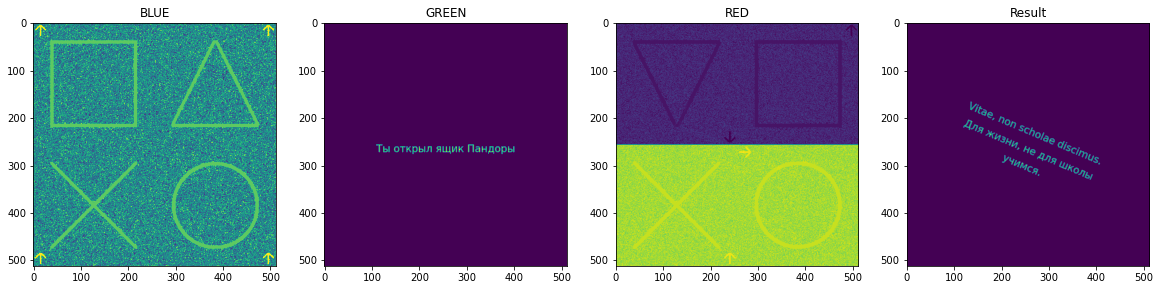

In [7]:
import matplotlib.pyplot as plot
img = plot.imread('encrypted.png')
pic, axes = plot.subplots(1,4)
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]
axes[0].imshow(b)
axes[0].set_title('BLUE')
pic.set_figwidth(20)
pic.set_figheight(10)
axes[1].imshow(g)
axes[1].set_title('GREEN')
axes[2].imshow(r)
axes[2].set_title('RED')
fst_quater = b[:256, 256:]
fst_quater = 1 - fst_quater[::-1]
scnd_quater = 1 - b[:256, :256][:, ::-1]
trd_quater = b[256:, :256]
trd_quater = trd_quater[::-1][::-1][:, ::-1]
frth_quater = b[256:, 256:].T[::-1].T[::-1].T
arr1 = np.concatenate([fst_quater, scnd_quater], axis=1)
arr2 = np.concatenate([trd_quater, frth_quater], axis=1)
array = np.concatenate([arr1, arr2])
axes[3].imshow(r - array)
axes[3].set_title('Result')


## Matplotlib [10/100]

### Matplotlib [A]

Используя данные из задачи **Numpy [A]** визуализировать:
- точки
- треугольники (цветом треугольника показать его площадь)
- центры треугольников

Выполнить поворот всех треугольников относительно их общего центра на 30 градусов и повторно визуализировать, как указано выше.

- точки

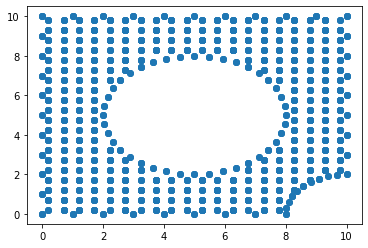

In [8]:
import matplotlib.pyplot as plt
import numpy as np
graph = np.array(arr)
plt.scatter(graph[:, :, 0], graph[:, :, 1])
plt.show()


- треугольники 

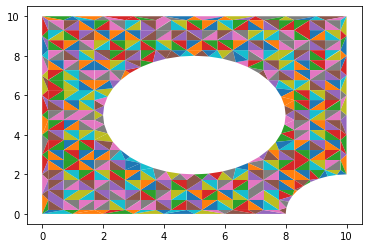

In [9]:
for i in graph:
    plt.fill(i[:, 0], i[:, 1])
plt.show()


- центры треугольников

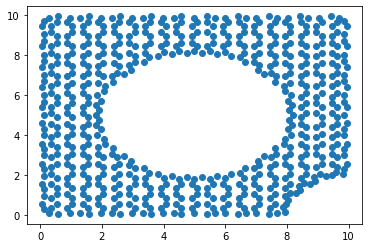

In [10]:
graph2 = np.array(coor)
plt.scatter(graph2[:, 0], graph2[:, 1])
plt.show()


- поворот

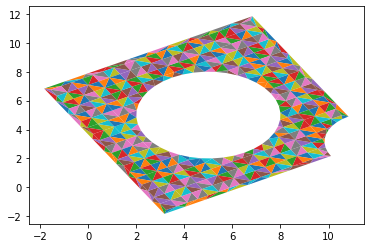

<Figure size 1e+06x1e+06 with 0 Axes>

In [11]:
import math
graph = np.array(arr)
for i in graph:
    plt.fill(5+(i[:, 0]-5)*math.cos(math.pi/6) - (i[:, 1] - 5)*math.sin(math.pi/6),
             5+(i[:, 0]-5)*math.sin(math.pi/6)+(i[:, 1] - 5)*math.cos(math.pi/6))
plt.figure(figsize=(500, 500),dpi = 2000)
plt.show()


### Matplotlib [B]

Повторить рисунок:

![arctan_x_cos_y.png](arctan_x_cos_y.png)

Text(0.5, 1.0, '$f(x, y) = arctan(x) \\cdot cos(x)$')

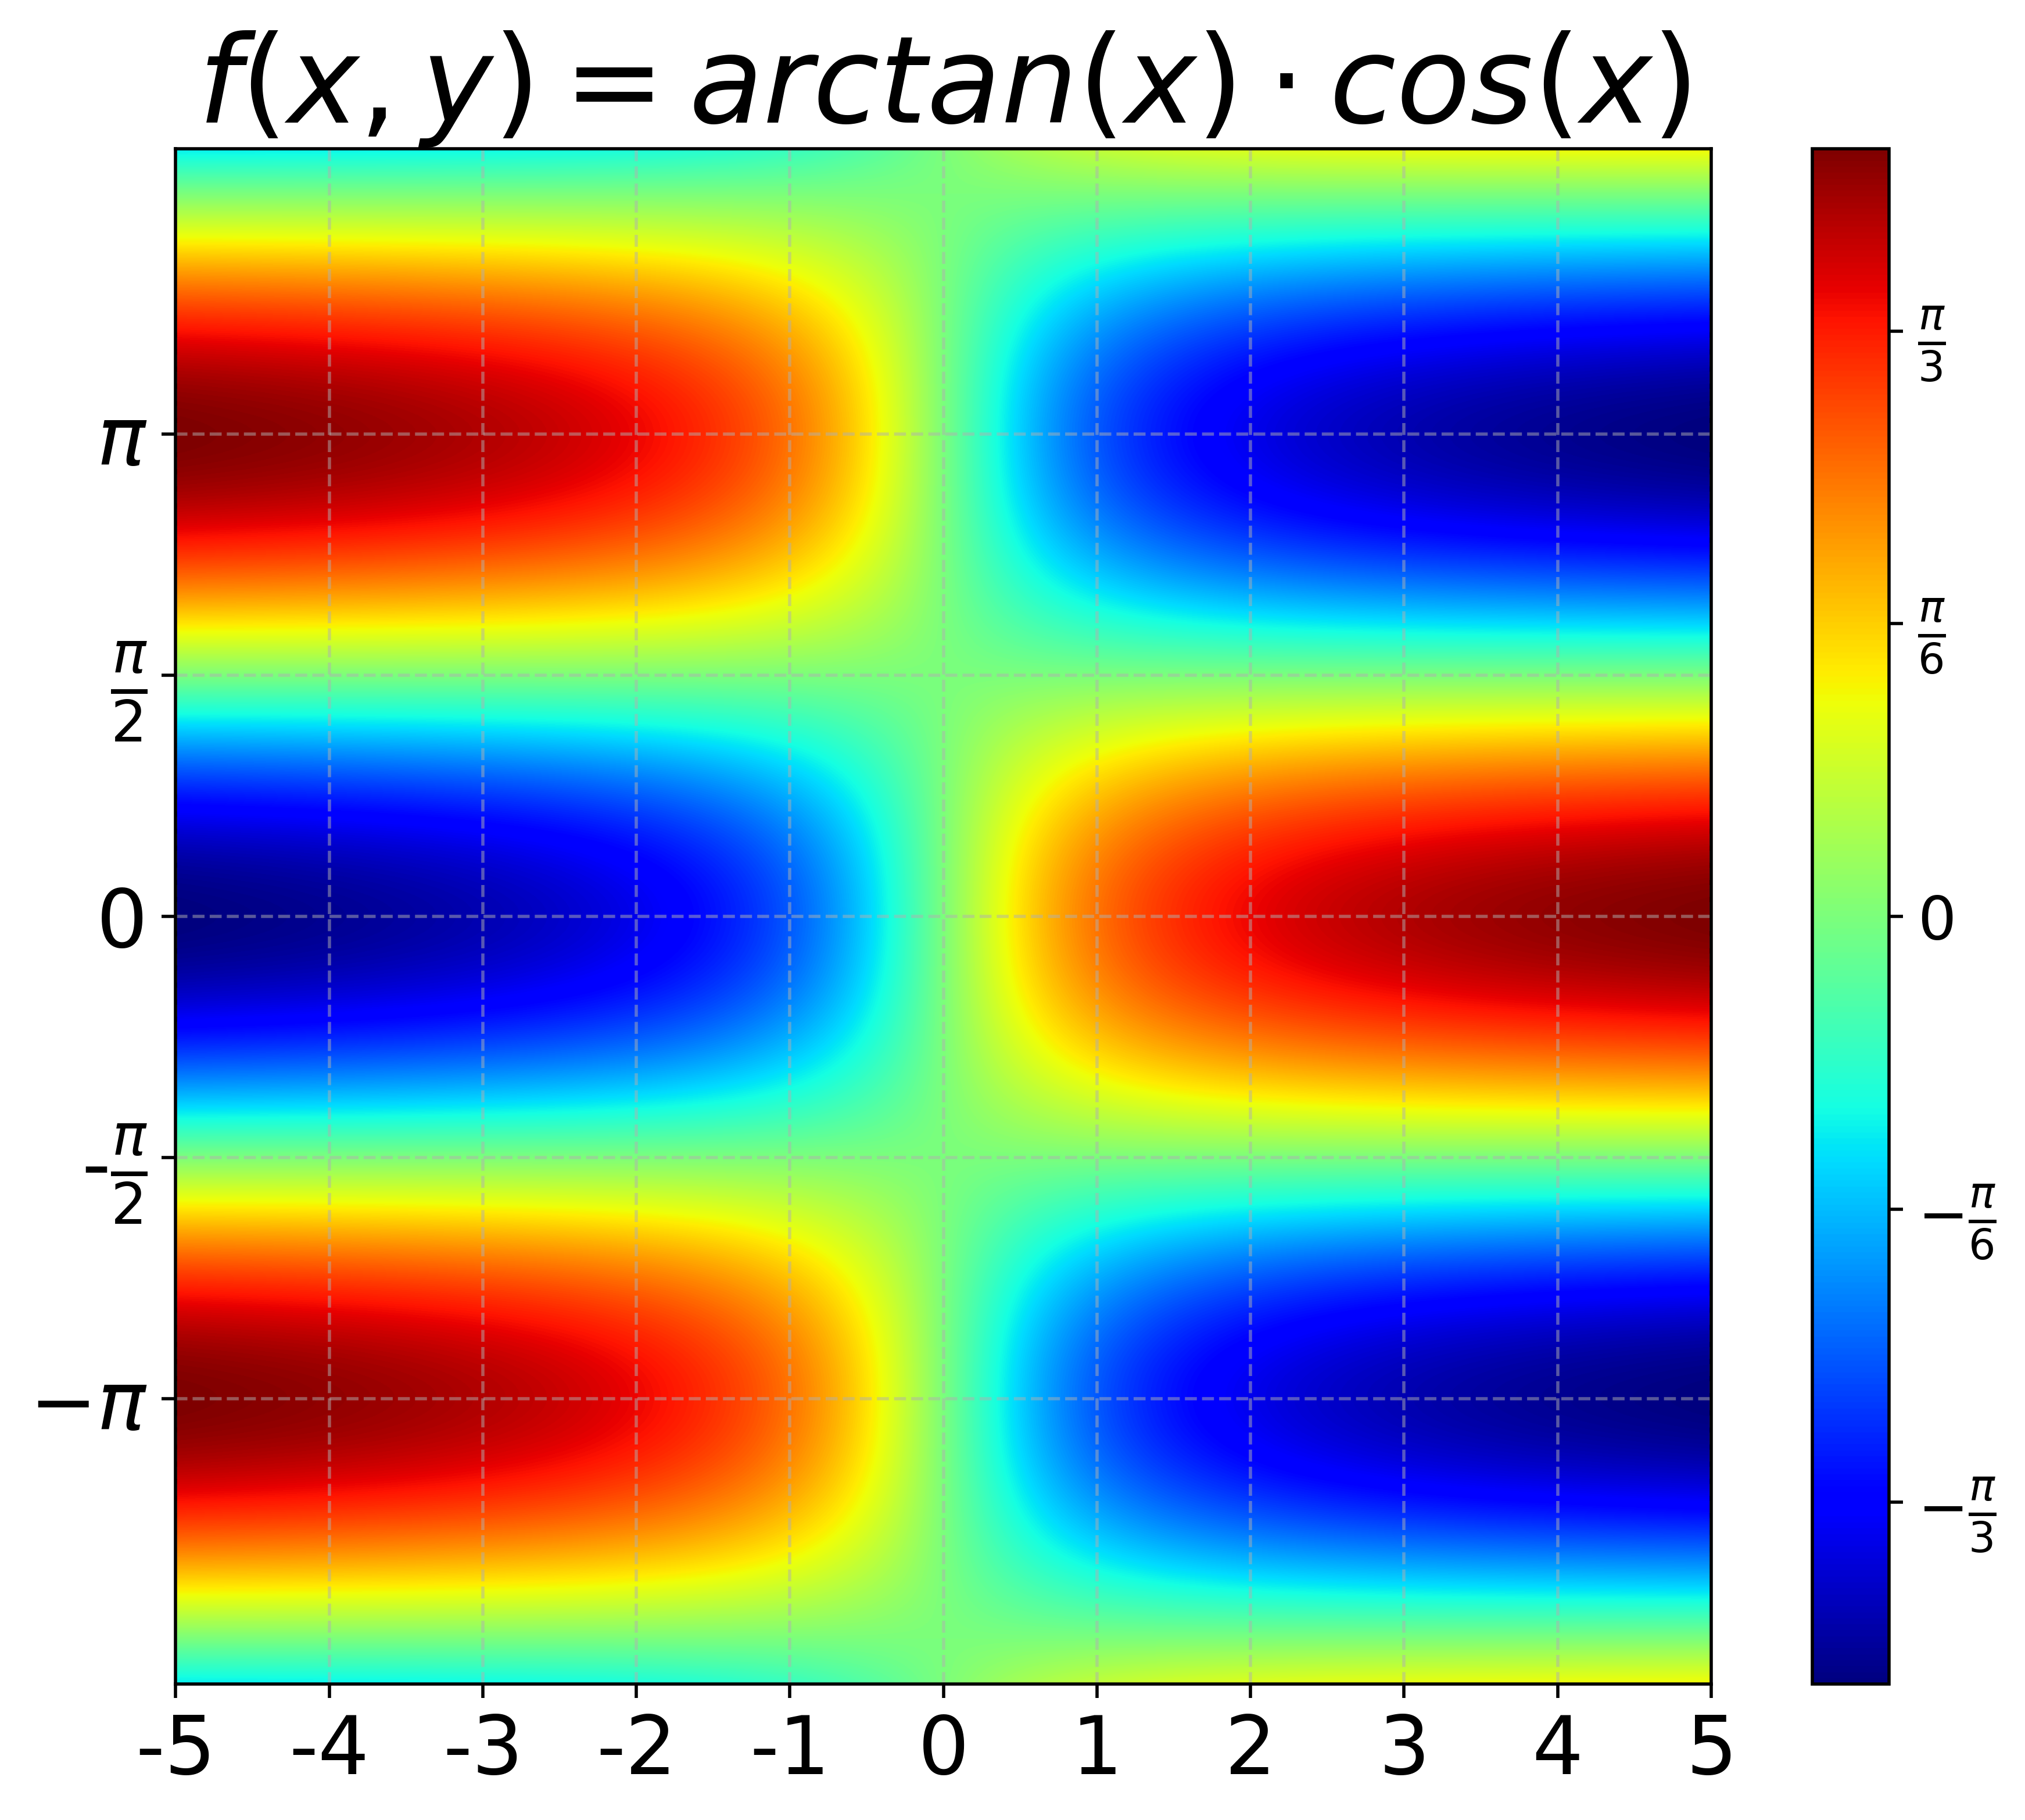

In [12]:
x = np.linspace(-5, 5, 512)
y = x.reshape(-1, 1)
z = np.arctan(x) * np.cos(y)

fig, ax = plt.subplots(1, 1, figsize=(9, 7), dpi=500)
im = ax.imshow(z, cmap='jet', interpolation='bilinear', extent=[x.min(), x.max(), y.min(), y.max()])

colorbar = fig.colorbar(im, ticks=[-np.pi / 3, -np.pi / 6, 0, np.pi / 6, np.pi / 3])
colorbar.ax.set_yticklabels([r'$-\frac{\pi}{3}$', r'$-\frac{\pi}{6}$', '0', r'$\frac{\pi}{6}$', r'$\frac{\pi}{3}$'], fontsize=15)
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_xticklabels(np.arange(-5, 6, 1), fontsize=20)
ax.set_yticks(np.arange(- np.pi, 3 * np.pi / 2, np.pi / 2))
ax.set_yticklabels([r"$-\pi$", r"-$\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$", r"$\pi$"], fontsize=20)
ax.grid(ls='--', alpha=0.5)
ax.set_title(r'$f(x, y) = arctan(x) \cdot cos(x)$', fontsize=30)


## Pandas [18/100]

При решении задач этого раздела подразумевается максимальное использование возможностей `pandas` и допускается использование `numpy`.

За использование любых сторонних циклов и их заменителей (итераторов, генераторов и др.) выставляется штраф.

### Pandas [A]

В файле `fin.csv` находятся записи о доходах и расходах физического лица.

Требуется рассчитать:

- среднемесячный доход для каждого года,
- среднемесячный расход по каждой категории для каждого года,
- сводную таблицу суммарных расходов: строки - Категория/Год, столбцы - Месяц,
- состояние счета физического лица на каждый день и изобразить график (в начальный момент времени счет был нулевым),
- даты, когда счет становился отрицательным,
- построить прогноз (линейный и квадратичный) состояния счета через год после последней записи.

1 ПУНКТ

Рассчитаем среднемесячный доход

In [47]:
import pandas as pd

df1 = pd.read_csv('fin.csv')
df1['ГОД'] = pd.DatetimeIndex(df1['ВРЕМЯ']).year
df1['МЕСЯЦ'] = pd.DatetimeIndex(df1['ВРЕМЯ']).month
df1['ДЕНЬ'] = pd.DatetimeIndex(df1['ВРЕМЯ']).day
df1['ДОХОДЫ'] = pd.DataFrame(df1['КАТЕГОРИЯ']=='Доходы')
df1_11 = pd.DataFrame(df1.groupby(['ГОД', 'МЕСЯЦ', 'ДОХОДЫ'])['СУММА'].sum())
df1_1 = pd.DataFrame(df1_11.groupby(['ГОД','ДОХОДЫ'])['СУММА'].mean())
df1_1
#msk = (df1_1['ДОХОДЫ'])
#df[df1['ДОХОДЫ']==True][['СУММА','ГОД','МЕСЯЦ']]


СУММА
ГОД  ДОХОДЫ               
2017 False  -159171.666667
     True    151685.666667
2018 False  -166691.000000
     True    186374.916667
2019 False  -133358.000000
     True    200122.888889

2 ПУНКТ

Найдем среднемесячный расход по каждой категории

In [14]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', None)
pd.DataFrame(df1.groupby(['ГОД', 'КАТЕГОРИЯ', 'МЕСЯЦ', 'ДОХОДЫ'])['СУММА'].mean())


СУММА
ГОД  КАТЕГОРИЯ  МЕСЯЦ ДОХОДЫ             
2017 Автомобиль 6     False  -2000.000000
                7     False  -4340.000000
                8     False   -850.000000
     Дом        6     False  -6044.000000
                7     False  -9492.666667
...                                   ...
2019 Хобби      5     False  -2165.333333
                6     False   -912.666667
                7     False  -1072.250000
                8     False  -1766.666667
                9     False  -1439.000000

[345 rows x 1 columns]

3 ПУНКТ

In [15]:
df3 = pd.DataFrame(df1.groupby(['КАТЕГОРИЯ', 'ГОД', 'МЕСЯЦ'])['СУММА'].sum())
df3

СУММА
КАТЕГОРИЯ  ГОД  МЕСЯЦ         
Автомобиль 2017 6      -4000.0
                7      -8680.0
                8      -1700.0
           2018 3      -1800.0
Дом        2017 6     -30220.0
...                        ...
Хобби      2019 5      -6496.0
                6      -2738.0
                7      -4289.0
                8      -5300.0
                9      -2878.0

[345 rows x 1 columns]

In [16]:
df3.pivot_table('СУММА', ['КАТЕГОРИЯ', 'ГОД'], 'МЕСЯЦ')


МЕСЯЦ                 1        2        3        4        5   ...       8   \
КАТЕГОРИЯ  ГОД                                                ...            
Автомобиль 2017      NaN      NaN      NaN      NaN      NaN  ...  -1700.0   
           2018      NaN      NaN  -1800.0      NaN      NaN  ...      NaN   
Дом        2017      NaN      NaN      NaN      NaN      NaN  ... -64300.0   
           2018 -64745.0 -42938.0 -43050.0 -43611.0 -61444.0  ... -57725.0   
           2019 -39690.0 -39500.0 -38720.0 -38000.0 -47969.0  ... -66210.0   
...                  ...      ...      ...      ...      ...  ...      ...   
Украшения  2018      NaN      NaN      NaN      NaN      NaN  ...      NaN   
           2019      NaN      NaN  -5000.0      NaN      NaN  ...      NaN   
Хобби      2017      NaN      NaN      NaN      NaN      NaN  ...  -1200.0   
           2018      NaN      NaN  -2630.0  -4182.0  -3286.0  ...  -2815.0   
           2019      NaN  -1600.0  -3520.0   -790.0  -6496.0  ...  -5300.0   

МЕСЯЦ                 9        10       11       12  
КАТЕГОРИЯ  ГОД                                       
Автомобиль 2017      NaN      NaN      NaN      NaN  
           2018      NaN      NaN      NaN      NaN  
Дом        2017 -29255.0  -2220.0 -28366.0 -99316.0  
           2018 -43211.0 -40290.0 -48230.0 -40090.0  
           2019 -38070.0      NaN      NaN      NaN  
...                  ...      ...      ...      ...  
Украшения  2018      NaN  -4800.0      NaN      NaN  
           2019      NaN      NaN      NaN      NaN  
Хобби      2017      NaN      NaN      NaN      NaN  
           2018  -6180.0  -6360.0  -6130.0  -2700.0  
           2019  -2878.0      NaN      NaN      NaN  

[54 rows x 12 columns]

4 ПУНКТ

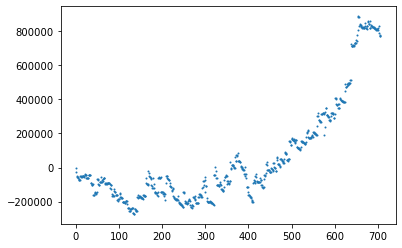

In [17]:
df4 = df1.sort_values(['ВРЕМЯ'])
df4 = df4[['ГОД', 'МЕСЯЦ', 'ДЕНЬ', 'СУММА']]
df4 = pd.DataFrame(df4.groupby(['ГОД', 'МЕСЯЦ', 'ДЕНЬ'])['СУММА'].sum())
df4 = df4.assign(КУМСУММ=df4['СУММА'].cumsum())
#df4
cumsum = df4['КУМСУММ'].values
#cumsum
fig = plt.scatter(np.arange(len(cumsum)), cumsum, s=1)


5 ПУНКТ

In [18]:
condition = (df4['КУМСУММ'] < 0)
df4[condition]


СУММА  КУМСУММ
ГОД  МЕСЯЦ ДЕНЬ                  
2017 4     28     -958.0   -958.0
           29   -22592.0 -23550.0
           30   -28180.0 -51730.0
     5     1     -4792.0 -56522.0
           2     -1725.0 -58247.0
...                  ...      ...
2018 11    1     -3484.0 -20763.0
           6      -500.0   -256.0
           7     -3167.0  -3423.0
           8    -15640.0 -19063.0
           9     -1425.0 -20488.0

[434 rows x 2 columns]

6 ПУНКТ

Через год: 902389.2522227806


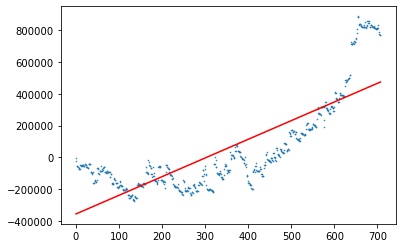

In [19]:
line_reg = np.polyfit(np.arange(len(cumsum)), cumsum, 1)
plt.scatter(np.arange(len(cumsum)), cumsum, s=0.3)
plt.plot(np.linspace(0, len(cumsum), len(cumsum)), np.poly1d(
    line_reg)(np.linspace(0, len(cumsum), len(cumsum))), c='red')
print('Через год:',
      np.polyval(line_reg, len(cumsum) + 366))


Через год: 2987176.815435772


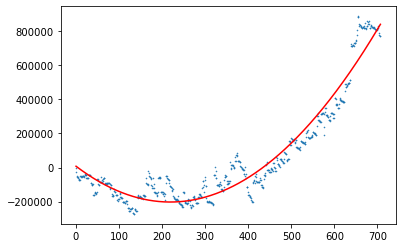

In [20]:
quad_reg = np.polyfit(np.arange(len(cumsum)), cumsum, 2)
plt.scatter(np.arange(len(cumsum)), cumsum, s=0.3)
plt.plot(np.linspace(0, len(cumsum), len(cumsum)), np.poly1d(
    quad_reg)(np.linspace(0, len(cumsum), len(cumsum))), c='red')
print('Через год:',
      np.polyval(quad_reg, len(cumsum) + 366))


### Pandas [B]

В файле `students.csv` находится список студентов. 
В файле `grades.csv` - оценки за контрольную работу.

Столбец `hash` однозначно идентифицирует студента.

Контрольная работа состояла из 8 заданий. Веса всех заданий - одинаковые.

Требуется ответить на вопросы / вычислить:
- кто написал контрольную работу, а кто - нет?
- средняя оценка по каждому заданию у каждой группы? по всем заданиям у каждой группы?
- топ-5 лидеров и топ-5 отстающих.

По информации об оценках:
- выделить 2 главных компоненты при помощи `sklearn.decomposition.PCA`;
    - визуализировать результат `plt.scatter`;
    
    
- разбить на 4 кластера при помощи `sklearn.cluster.k_means`;
    - визуализировать предыдущий массив, используя в качестве цвета номер кластера;
    - на том же рисунке отметить центр кластера и подписать его номер;
    - вычислить для каждого кластера среднюю и медианную оценки;
    - для каждого кластера вывести номера групп.


In [21]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
students = pd.read_csv('students.csv')
grades = pd.read_csv('grades.csv')


- кто написал контрольную работу, а кто - нет?

In [22]:
grades_df = pd.read_csv('grades.csv', index_col=0)
students_df = pd.read_csv('students.csv')
students_hash = pd.merge(grades, students, on='hash', how='outer')
wrt = (students_hash['0'].notna())
n_wrt = (students_hash['0'].isna())
students_hash[wrt]


,Unnamed: 0,hash,0,1,2,...,8,Группа,Фамилия,Имя,Отчество
0,0.0,cbe32a2a1b,0.8,1.0,1.0,...,0.0,БПМ-162,Сучков,Даниил,Викторович
1,1.0,caa93590ad,0.2,0.2,0.9,...,0.0,БПМ-161,Хмельницкий,Даниил,Анатольевич
2,2.0,5bbe47f96d,0.8,1.0,1.0,...,0.0,БПМ-162,Углов,Егор,Алексеевич
3,3.0,3f187965b9,0.0,0.0,0.8,...,0.0,БПМ-161,Гончаров,Глеб,Игоревич
4,4.0,bf1e56e185,0.0,0.0,0.0,...,0.0,БПМ-161,Мартынов,Никита,Игоревич
...,...,...,...,...,...,...,...,...,...,...,...
33,33.0,c11c124eb9,0.0,1.0,1.0,...,0.7,БПМ-161,Хайкова,Светлана,Павловна
34,34.0,8b4c1af94b,0.8,1.0,1.0,...,0.7,БПМ-162,Гаврилов,Тимофей,Периклович
35,35.0,e1388f2aae,0.0,0.5,0.0,...,0.0,БПМ-161,Дудинов,Тимур,Батырович
36,36.0,ee55242421,0.8,1.0,0.0,...,0.0,БПМ-162,Ростовцев,Федор,Владимирович


In [23]:
students_hash[n_wrt]


,Unnamed: 0,hash,0,1,2,...,8,Группа,Фамилия,Имя,Отчество
38,NaN,1d1d05c257,NaN,NaN,NaN,...,NaN,БПМ-161,Высоцкий,Яков,Михайлович
39,NaN,738b683ed7,NaN,NaN,NaN,...,NaN,БПМ-161,Галигеров,Владислав,Сергеевич
40,NaN,6df2f31eb9,NaN,NaN,NaN,...,NaN,БПМ-161,Городилов,Илья,Игоревич
41,NaN,8bb7fb51c3,NaN,NaN,NaN,...,NaN,БПМ-161,Корякин,Дмитрий,Александрович
42,NaN,9c08206449,NaN,NaN,NaN,...,NaN,БПМ-161,Ларичева,Мария,Максимовна
...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,5a44ca37d2,NaN,NaN,NaN,...,NaN,БПМ-163,Черников,Дмитрий,Владимирович
91,NaN,f2d63ba1da,NaN,NaN,NaN,...,NaN,БПМ-163,Шухова,Вероника,Валерьевна
92,NaN,5389cb6370,NaN,NaN,NaN,...,NaN,БПМ-163,Ячменева,Виктория,Сергеевна
93,NaN,6311bbb17e,NaN,NaN,NaN,...,NaN,БПМ-163,Бусурин,Антон,-


- средняя оценка по каждому заданию у каждой группы?

In [24]:
mean_mark_bygroup = students_hash.groupby(
    ['Группа'])[students_hash.columns[2:11]].mean()
mean_mark_bygroup


,0,1,2,3,4,5,6,7,8
Группа,,,,,,,,,
БПМ-161,0.133333,0.527778,0.550000,0.633333,0.238889,0.094444,0.055556,0.044444,0.088889
БПМ-162,0.761111,0.883333,0.733333,0.766667,0.544444,0.266667,0.305556,0.155556,0.427778
БПМ-163,0.100000,0.950000,1.000000,1.000000,0.500000,0.500000,0.000000,0.000000,0.300000


- средняя оценка по всем заданиям у каждой группы?

In [25]:
mean_mark_bygroup['Среднее'] = mean_mark_bygroup[students_hash.columns[2:11]].sum(axis=1)
mean_mark_bygroup['Среднее']


Группа
БПМ-161    2.366667
БПМ-162    4.844444
БПМ-163    4.350000
Name: Среднее, dtype: float64

- топ-5 лидеров и топ-5 отстающих.

In [26]:
students_hash['Сумма оценок'] = students_hash[students_hash.columns[2:11]].sum(
    axis=1)
sorted = students_hash[wrt].sort_values('Сумма оценок')
sorted.sort_values('Сумма оценок')[::-1][:5]


,Unnamed: 0,hash,0,1,2,...,Группа,Фамилия,Имя,Отчество,Сумма оценок
25,25.0,cb9dfc5d66,0.8,1.0,1.0,...,БПМ-162,Суслопаров,Максим,Владимирович,6.6
6,6.0,2a5a018502,0.9,1.0,1.0,...,БПМ-162,Островский,Всеволод,Петрович,5.9
0,0.0,cbe32a2a1b,0.8,1.0,1.0,...,БПМ-162,Сучков,Даниил,Викторович,5.8
23,23.0,6134e7ea6f,0.8,1.0,1.0,...,БПМ-162,Стрельцов,Макар,Андреевич,5.7
33,33.0,c11c124eb9,0.0,1.0,1.0,...,БПМ-161,Хайкова,Светлана,Павловна,5.6


In [27]:
#Худшие
sorted[:5]


,Unnamed: 0,hash,0,1,2,...,Группа,Фамилия,Имя,Отчество,Сумма оценок
27,27.0,237fe82b6f,0.0,0.0,0.0,...,БПМ-162,Мязин,Михаил,Александрович,0.0
4,4.0,bf1e56e185,0.0,0.0,0.0,...,БПМ-161,Мартынов,Никита,Игоревич,0.0
13,13.0,15360bcc4c,0.0,0.0,0.0,...,БПМ-161,Богатов,Антон,Юрьевич,0.0
35,35.0,e1388f2aae,0.0,0.5,0.0,...,БПМ-161,Дудинов,Тимур,Батырович,0.5
37,37.0,d6c40a7f4b,0.0,1.0,0.0,...,БПМ-161,Шкляр,Эрнест,-,1.0


- выделить 2 главных компоненты при помощи `sklearn.decomposition.PCA`;

In [28]:
from sklearn.decomposition import PCA
grades_arr = students_hash[wrt][students_hash.columns[2:11]].values
pca = PCA(n_components=2).fit(grades_arr)


- визуализировать результат `plt.scatter`;

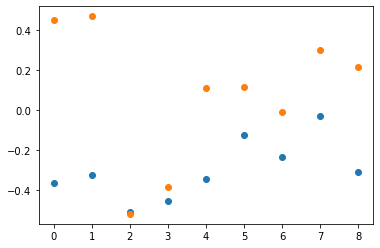

In [29]:
plt.scatter(np.arange(len(pca.components_[0])), pca.components_[0])
plt.scatter(np.arange(len(pca.components_[1])), pca.components_[1])


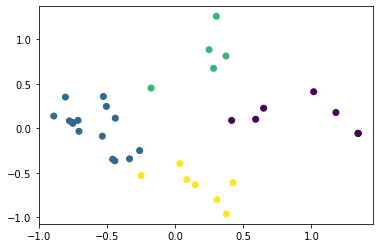

In [30]:
from sklearn.cluster import KMeans

grades_arr_T = pca.fit_transform(grades_arr)
fig, ax = plt.subplots(1, 1)
ax.scatter(grades_arr_T[:, 0], grades_arr_T[:, 1], c=KMeans(n_clusters=4).fit(grades_arr_T).predict(grades_arr_T))
plt.show()


## Scipy [15/100]

При решении задач этого раздела подразумевается использование методов и алгоритмов в `Scipy`.


### Scipy [A]

Построить 10 фазовых траекторий $\dot x(x), \dot y(y)$, а также зависимостей $y(x)$ для задачи "хищник-жертва"; подписать оси

Задача "хищник-жертва" описывается моделью Лотки-Вольтерры:

$\dot x = \alpha x - \beta x y$

$\dot y = \delta x y - \gamma y$

где $x(t)$ - размер популяции жертв, $y(t)$ - размер популяции хищников.

Параметры модели $\alpha, \beta, \gamma, \delta$ выбрать самостоятельно.

Начальные условия взять на линии $y = x$ на отрезке $[0.1, 1.1]$.

Вычислить период колебаний размеров популяций жертв и хищников.

In [48]:
from scipy.integrate import ode, solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a = 2
b = 1
d = 1
g = 1


def eq(t, s):
    ds = np.empty_like(s)
    x, y = s
    ds[0] = a*x-b*x*y
    ds[1] = d*x*y-g*y
    return ds


def phase_count_1(t, s):
    return (a*t-b*s*t)[1]


phase_count_1.terminal = False
phase_count_1.direction = 1


def phase_count_2(t, s):
    return (d*s*t-g*t)[0]


phase_count_2.terminal = False
phase_count_2.direction = 1


4.669286519825555 7.7203155634328375


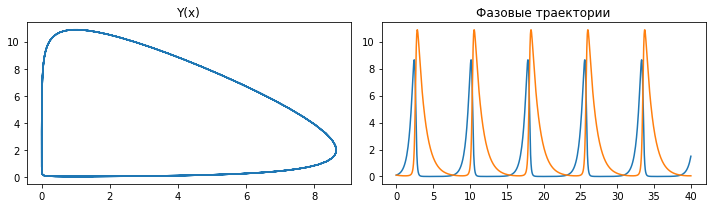

In [49]:
t0 = 0
t1 = 40

s0 = np.array([0.1, 0.1])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1, rtol=1e-12, atol=1e-12, events = [phase_count_1, phase_count_2])

plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])


plt.subplot(1,2,1)
plt.plot(*sol.y)
plt.title('Y(x)')
plt.tight_layout()
print(sol.t_events[0][1]-sol.t_events[0][0], sol.t_events[1][2]-sol.t_events[1][1])

6.583160674946286 6.5831606749463365


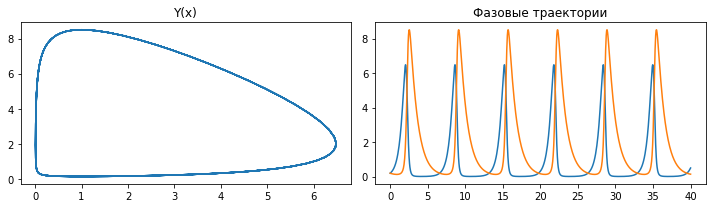

In [23]:
s0 = np.array([0.2, 0.2])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1,
                rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0], sol.t_events[1][2]-sol.t_events[1][1])


5.966715557101904 5.9667155571018515


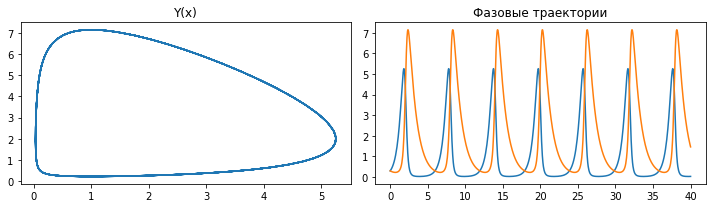

In [24]:
s0 = np.array([0.3, 0.3])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1, rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0], sol.t_events[1][2]-sol.t_events[1][1])


5.567361099498088 5.567361099497735


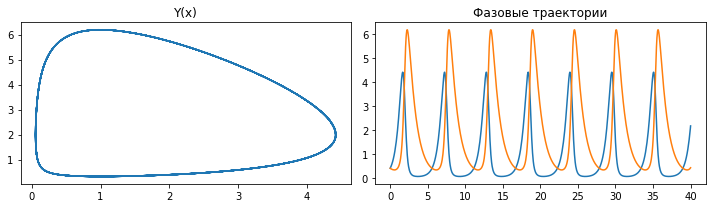

In [25]:
s0 = np.array([0.4, 0.4])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1, rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0], sol.t_events[1][2]-sol.t_events[1][1])


5.28752500047867 5.287525000478885


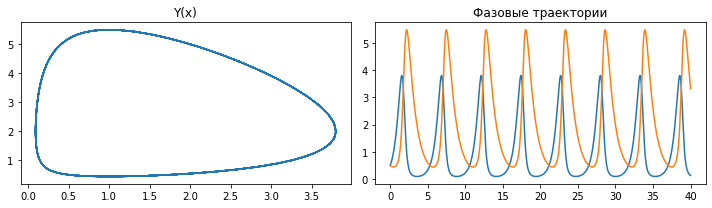

In [26]:
s0 = np.array([0.5, 0.5])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1,
                rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0],
      sol.t_events[1][2]-sol.t_events[1][1])


5.082965092302656 5.0829650923025635


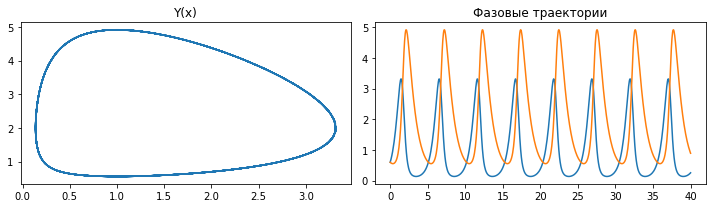

In [27]:
s0 = np.array([0.6, 0.6])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1,
                rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0],
      sol.t_events[1][2]-sol.t_events[1][1])


4.929848898439963 4.929848898440021


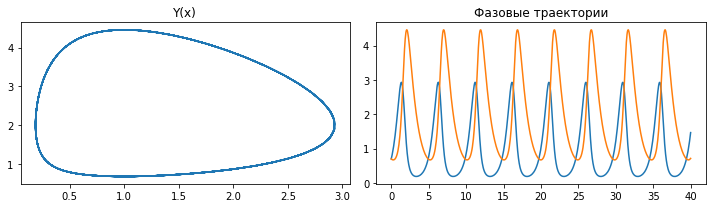

In [28]:
s0 = np.array([0.7, 0.7])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1,
                rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0],
      sol.t_events[1][2]-sol.t_events[1][1])


4.8139149567456005 4.813914956745809


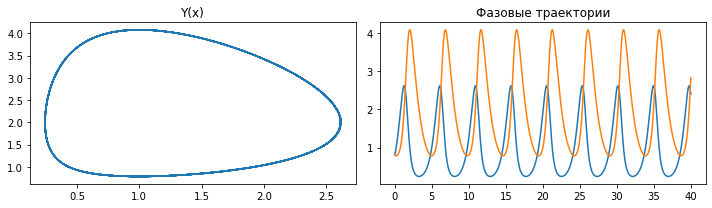

In [29]:
s0 = np.array([0.8, 0.8])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1,
                rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0],
      sol.t_events[1][2]-sol.t_events[1][1])


4.72599632155466 4.725996321554469


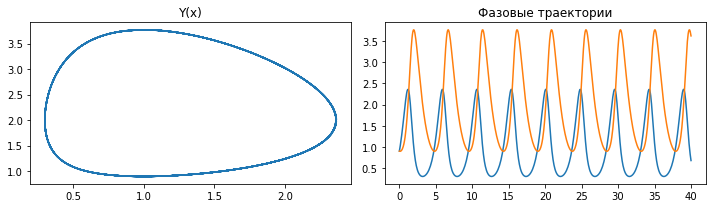

In [30]:
s0 = np.array([0.9, 0.9])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1,
                rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0],
      sol.t_events[1][2]-sol.t_events[1][1])


4.6598844812973805 4.659884481297358


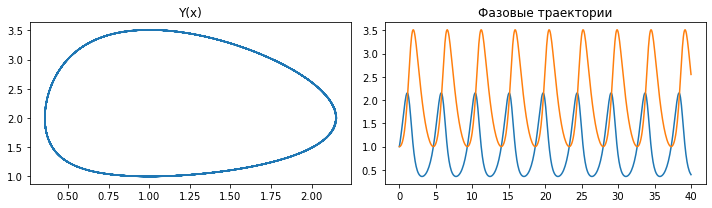

In [31]:
s0 = np.array([1, 1])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1,
                rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0],
      sol.t_events[1][2]-sol.t_events[1][1])


3.0159902362982987 4.611202167524772


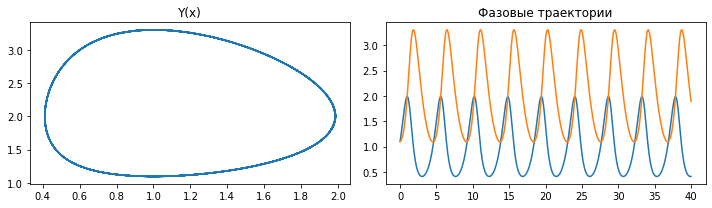

In [50]:
s0 = np.array([1.1, 1.1])
sol = solve_ivp(eq, [t0, t1], s0, method='DOP853', max_step=0.1,
                rtol=1e-12, atol=1e-12, events=[phase_count_1, phase_count_2])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Фазовые траектории')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Y(x)')

plt.tight_layout()

print(sol.t_events[0][1]-sol.t_events[0][0],
      sol.t_events[1][2]-sol.t_events[1][1])


### Scipy [B]

Численно определить период колебаний [математического маятника](https://ru.wikipedia.org/wiki/Математический_маятник) для всех режимов его движения:
- малые колебания (гармонические),
- большие колебания,
- вращение с переходом через неустойчивое положение равновесия.

Для одного периода колебаний построить графики: 
- изменения угла и угловой скорости от времени $\theta(t), \dot \theta(t)$.
- фазовой траектории $\dot \theta(\theta)$

При помощи `holoviews` создать анимированный график движения маятника в координатной и фазовой плоскостях, схожего с приведенными по [ссылке](https://ru.wikipedia.org/wiki/Математический_маятник).

In [51]:
from math import sin

def equal(t, s): 
    ds = np.empty_like(s)
    theta, omega = s
    ds[0] = omega
    ds[1] = -sin(theta)
    return ds


def phase_count_3(t, s):
    return s[0]


phase_count_3.terminal = False
phase_count_3.direction = -1


def phase_count_4(t, s):
    return sin(s[0])


phase_count_4.terminal = False
phase_count_4.direction = 0


t0 = 0
t1 = 10*np.pi 
s0 = np.array([0, 0.000001])

sol = solve_ivp(equal, [t0, t1], s0, method='DOP853',
                max_step=0.1, rtol=1e-12, atol=1e-12, events=[phase_count_3])

sol.t_events[0][1]-sol.t_events[0][0]


6.283185307179982

7.003015211663037

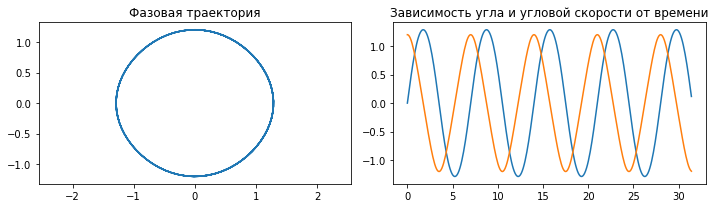

In [33]:
s0 = np.array([0, 1.2])

sol = solve_ivp(equal, [t0, t1], s0, method='DOP853',
                max_step=0.1, rtol=1e-12, atol=1e-12, events=[phase_count_3])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 2)
plt.title('Зависимость угла и угловой скорости от времени')
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

plt.subplot(1, 2, 1)
plt.plot(*sol.y)
plt.title('Фазовая траектория')
plt.axis('equal')

plt.tight_layout()

sol.t_events[0][1]-sol.t_events[0][0]


In [34]:
s0 = np.array([0, 10])

sol = solve_ivp(equal, [t0, t1], s0, method='DOP853',
                max_step=0.1, rtol=1e-12, atol=1e-12, events=[phase_count_4])

sol.t_events[0][1]-sol.t_events[0][0]


3.141592653589793

## Numba [15/100]

При решении задач этого раздела подразумевается использование возможностей `numba` и допускается использование `joblib`.

### Numba [A]

Создать функции для расчета [фрактала Ляпунова](https://ru.wikipedia.org/wiki/Фрактал_Ляпунова), откомпилировать и распараллелить расчеты, используя возможности `numba` или `joblib`.
Построить интерактивный рисунок с возможностью перемещения и масштабирования фрактала при помощи `holoviews`.


C:\Users\6C0B~1\AppData\Local\Temp/ipykernel_6972/1710370969.py:38: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "getlyapexponent" failed type inference due to: Cannot unify float64 and array(float64, 2d, C) for 'x.3', defined at C:\Users\6C0B~1\AppData\Local\Temp/ipykernel_6972/1710370969.py (44)

File "..\..\..\6C0B~1\AppData\Local\Temp\ipykernel_6972\1710370969.py", line 44:
<source missing, REPL/exec in use?>

During: typing of assignment at C:\Users\6C0B~1\AppData\Local\Temp/ipykernel_6972/1710370969.py (44)

File "..\..\..\6C0B~1\AppData\Local\Temp\ipykernel_6972\1710370969.py", line 44:
<source missing, REPL/exec in use?>

  @jit
C:\Users\6C0B~1\AppData\Local\Temp/ipykernel_6972/1710370969.py:38: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "getlyapexponent" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "

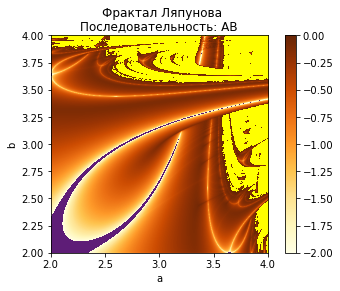

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
from numba import prange
from timeit import default_timer as timer
start = timer()

seq = "AB"
a_lb = 2
a_ub = 4
b_lb = 2
b_ub = 4        

num_warmups = 10
num_lyap_iterations = 100
steps = 500

@jit
def F(x, curr_r):
    return (curr_r * x) * (1 - x)

@jit
def Fprime(x, curr_r):
    ans = curr_r * (1 - (2 * x))
    ans[ans == 0] = 0.0001
    ans[ans == -np.inf] = -1000
    ans[ans == np.inf] = 1000
    return ans

@jit
def getseqval(curr_iteration, a, b):
    index = np.mod(curr_iteration, len(seq))
    if (seq[index] == 'A'):
        return a
    else:
        return b

@jit
def getlyapexponent(time_scale):
    b1, b2 = time_scale
    x = .5
    lyap_sum = 0

    for i in range(num_warmups):
        x = F(x, getseqval(i, b1, b2))

    for i in range(num_warmups, num_lyap_iterations + num_warmups):
        lyap_sum += np.log(np.abs(Fprime(x, getseqval(i, b1, b2))))
        x = F(x, getseqval(i, b1, b2))

    return (lyap_sum / num_lyap_iterations)

a = np.linspace(a_lb, a_ub, steps)
b = np.linspace(b_lb, b_ub, steps)
aa, bb = np.meshgrid(a, b)

fractal_grid = getlyapexponent((bb, aa))


plt.figure()
#'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r'
lyap_cmap = plt.get_cmap('YlOrBr')
lyap_cmap.set_over('Yellow')
lyap_cmap.set_under('#5e1d77')
plt.suptitle("Фрактал Ляпунова")
plt.title("Последовательность: " + seq)
plt.xlabel("a")
plt.ylabel("b")
im = plt.imshow(fractal_grid, cmap=lyap_cmap, vmin=-2, vmax=0,
                origin="lower", extent=(a_lb, a_ub, b_lb, b_ub))
plt.colorbar(im)

end = timer()
#print("elapsed time: " + str(end - start))


### Numba [B]

Реализовать метод численного интегрирования [Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты) 4 порядка с постоянным шагом по времени. 
Выполнить компиляцию при помощи `numba`.

Сравнить время вычислений при решении задачи Коши для модели, описанной в задаче **Scipy [B]**:
- scipy.integrate.solve_ivp (метод `DOPRI5`)
- scipy.integrate.ode (метод `DOPRI5`)
- ваша реализация


In [38]:
from numba import njit
@njit(fastmath = True, parallel = True)
def runge(x0,y0,x,step):
    it_col = int((x-x0)/step)
    d=y0
    for i in prange(1,it_col):
        k1 = step*(x0-y)/2
        k2 = step*(x0+0.5*step-y+0.5*k1)/2
        k3 = step*(x0+0.5*step-y+0.5*k2)/2
        k4 = step*(x0+step-y+k3)/2
        d = d + (1/6)*(k1+2*k2+2*k3+k4)
        x0 = x0 + step
    return d


## Classes [15/100]

Создать иерархию классов `Shape` $\leftarrow$ `Circle`, `Rectangle`, `Union`, `Intersection`, `Not`.

Класс `Shape` содержит абстрактные методы `draw(self, ax=None)`, `distance(self, x, y)`.

Вся иерархия должна содержать:
- конструктор `__init__`:
    - классы `Circle` и `Rectangle` получают необходимые координаты, размеры, цвет;
    - классы `Union`, `Intersection`, `Not` получают ссылки на другие объекты наследников класса `Shape`;
    
    
- метод `draw(self, ax=None)`, который отрисовывает объект при помощи `matplotlib`:
    - `ax` - оси рисунка `matplotlib`; если `ax==None`, то рисовать в текущих осях;
    - `Circle` и `Rectangle` отображают себя при помощи `plt.Circle`, `plt.Rectangle`;
    - классы `Union`, `Intersection`, `Not` отображают объекты, на которых они построены;
    
    
- метод `distance(self, x, y)` возвращает расстояние от границы объекта до точки `(x, y)`:
    - расстояние должно иметь знак, т.е., если точка внутри объекта, то расстояние должно быть отрицательным;
    - `Union.distance` = минимальное из расстояний от точки до всех его объектов;
    - `Intersection.distance` = максимальное из расстояний от точки до всех его объектов;
    - `Not.distance` = расстояние, взятое с обратным знаком.

Необходимо:
- cоздать не менее одного объекта каждого класса (кроме `Shape`) и построить один сборный объект `f`;
- визуализировать объект `f` (должен корректно отработать его метод `draw`);
- вычислить метод `f.distance` на регулярной решетке размером 200х200 точек (решетка должна покрывать весь объект `f`);
- визуализировать полученную матрицу расстояний, например при помощи `plt.pcolormesh`;
- на этом же рисунке изобразить контурную линию уровня 0 (`plt.contour`).

Пример:

```
c1 = Circle(5, 5, 3, color=(1, 0, 0, 0.5))
c2 = Circle(6.5, 6.5, 1, color=(0, 1, 0, 0.5))
c3 = Circle(3.5, 3.5, 1, color=(0, 1, 0, 0.5))
c4 = Circle(6.5, 3.5, 1, color=(0, 1, 0, 0.5))
c5 = Circle(3.5, 6.5, 1, color=(0, 1, 0, 0.5))
c6 = Circle(5, 5, 1, color=(0, 1, 0, 0.5))
r = Rect(3.5, 3.5, 6.5, 6.5, color=(0, 0, 1, 0.5))
u = Intersection(Intersection(Union(r, c2, c3, c4, c5), c1), Not(c6))
```

<table>
    <tr>
        <td><img src='classes_plot.png' width=350/></td>
        <td><img src='classes_sdf.png' width=400/></td>
    </tr>
</table>

Полезные ссылки:
- [Основы Signed Distance Field в 2D](https://habr.com/ru/post/438316/)

In [49]:
class Shape:

    def __init__(self, x: float, y: float, color: tuple):
        super().__init__()
        self.x = x
        self.y = y
        self.color = color

    def draw(self, ax=None):
        raise NotImplementedError()

    def distance(self, x, y):
        raise NotImplementedError()

    def getXY(self):
        return (self.x, self.y)

    def setColor(self, color):
        self.color = color

    def getColor(self):
        return self.color


class Circle(Shape):

    def __init__(self, x: float, y: float, radius: float, color: tuple):
        super().__init__(x, y, color)
        self.radius = radius

    def draw(self, ax=None):
        axes = ax if ax is not None else plt.gca()
        circ = plt.Circle(xy=self.getXY(),
                          radius=self.radius,
                          color=self.getColor())
        axes.add_patch(circ)

    def distance(self, x, y):
        pass


class Rectangle(Shape):

    def __init__(self, x: float, y: float, height: float, width: float, color: tuple):
        super().__init__(x, y, color)
        self.height = height
        self.width = width

    def draw(self, ax=None):
        axes = ax if ax is not None else plt.gca()
        rect = plt.Rectangle(xy=self.getXY(), height=self.height, width=self.width, color=self.getColor())
        axes.add_patch(rect)

    def distance(self, x, y):
        pass


## generators [15/100]

При решении задач этого раздела необходимо создать генераторы, т.е. функции, позволяющие вычислять следующий элемент последовательности. Допускается конструирование на основе существующих генераторов (напр., `range`, `map`, и т.д.)


### generators [A]

Создать генераторы `dot`, `matmul` для вычисления скалярного произведения двух списков и матричного произведений двух матриц, заданных списками списков.

In [39]:
def dot(arr1, arr2):
    yield sum(list(map(lambda el1, el2: el1*el2, arr1, arr2)))

def matmul(A, B):
    C = [[0 for row in range(len(A))] for col in range(len(B[0]))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k]*B[k][j]
            yield C[i][j]

a = [[5, 3], [12, 6]]
b = [[1, 9], [2, 4]]
mat = matmul(a, b)
print(mat)
print(list(mat))


<generator object matmul at 0x000000774A986EB0>
[11, 57, 24, 132]


### generators [B]

Создать генератор `progress`, работающий аналогично `range` и дополнительно выводящий на экран `progress bar` (полосу прогресса).

Для реализации полосы прогресса можно, например, воспользоваться виджетом `panel.indicators.Progress` из модуля `panel`, установленного вместе с `holoviews`.

Продемонстрировать работу генератора в цикле вызвав функцию `sleep` из модуля `time`.

In [40]:
import time
from tqdm.notebook import tqdm


def sign(x):
    return 1 if x >= 0 else -1

def progress(start, stop, step=1):
    s = sign(stop - start)
    if s != sign(step):
        return None
    i = start
    bar = tqdm(total=stop - start)
    while s * i < s * stop:
        yield i
        i += step
        bar.update(step)
        if s * (i + step) > s * stop:
            bar.close()


for i in progress(1, 20):
    print(i)
    time.sleep(1)




  0%|          | 0/19 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
